# Linear Dark Matter Simulation

In this part, we are going to show the lensing effects of the linear mass density. Note that, here we **roughly** simulate it using a string of `SphericalIsothermal` mass profiles on the galactic scale (*no `LinearIsothermal` profiles provided by PyAutoLens as far as I know*) to simulate it.

## Introduction

A strong gravitation lens is a system where two (or more) galaxies align perfectly down our line of sight, such that the foreground galaxy's mass (represented as mass profiles) deflects the light (represented as light profiles) of the background source galaxy(s).

When the alignment is just right and the lens is just massive enough, the background source galaxy appears multiple times. The schematic below shows a crude drawing of such a system, where two light-rays from the source are bending around the lens galaxy and into the observer (light should bend 'smoothly', but drawing this on a keyboard wasn't possible - so just pretend the diagonal lines coming from the observer and source are less jagged):

In [1]:
#  Observer                  Image-Plane               Source-Plane
#  (z=0, Earth)               (z = 0.5)                (z = 1.0)
#
#           ----------------------------------------------
#          /                                              \ <---- This is one of the source's light-rays
#         /                      __                       \
#    o   /                      / . \                      ___
#    |  /                      /  . \                     / . \
#   /\  \                      \  . /                     \___/
#        \                     \__ /                 Source Galaxy (s)
#         \                Lens Galaxy(s)                /
#           \                                           / <----- And this is its other light-ray
#            ------------------------------------------/

As an observer, we don't see the source's true appearance (e.g. a round blob of light). Instead, we only observe its light after it is deflected and lensed by the foreground galaxy's mass. In this exercise, we'll make a source galaxy image whose light has been deflected by a lens galaxy.

In the schematic above, we used the terms 'Image-Plane' and 'Source-Plane'. In lensing speak, a 'plane' is a collection of galaxies at the same redshift (that is, parallel to one another down our line-of-sight). Therefore:

If two or more lens galaxies are at the same redshift in the image-plane, they deflect light in the same way. This means we can sum the convergences, potentials and deflection angles of their mass-profiles.

If two or more source galaxies are at the same redshift in the source-plane, their light is ray-traced in the same way. Therefore, when determining their lensed images, we can sum the lensed images of each galaxy's light-profiles.

So, lets do it - lets use the 'plane' module in AutoLens to create a strong lensing system like the one pictured above. For simplicity, we'll assume 1 lens galaxy and 1 source galaxy.

## Implementation

We created a **lens galaxy** with 17 mass profiles. We do NOT create light profiles and other objects on image plane, e.g. the external shear.

We created a **source galaxy** with a light profile. We do NOT create a mass profile and other objects on source plane for simplicity.

It looks a little bit lengthy, as whether the `Galaxy` supports mass list is unknown. *But rendering those 17 mass profiles has already been slow. I am sure that, in CPU conditions, introducing mass profiles in Kilo-level+ would be a disaster...*

In [2]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt

In [3]:
image_plane_grid = al.grid.uniform(
    shape_2d=(100, 100), pixel_scales=0.05, sub_size=2
)

In [4]:
mass_profile_1 = al.mp.SphericalIsothermal(centre=(0.0, 0.0), einstein_radius=1.6)
mass_profile_2 = al.mp.SphericalIsothermal(centre=(0.5, 0.0), einstein_radius=1.6)
mass_profile_3 = al.mp.SphericalIsothermal(centre=(1.0, 0.0), einstein_radius=1.6)
mass_profile_4 = al.mp.SphericalIsothermal(centre=(1.5, 0.0), einstein_radius=1.6)
mass_profile_5 = al.mp.SphericalIsothermal(centre=(2.0, 0.0), einstein_radius=1.6)
mass_profile_6 = al.mp.SphericalIsothermal(centre=(-0.5, 0.0), einstein_radius=1.6)
mass_profile_7 = al.mp.SphericalIsothermal(centre=(-1.0, 0.0), einstein_radius=1.6)
mass_profile_8 = al.mp.SphericalIsothermal(centre=(-1.5, 0.0), einstein_radius=1.6)
mass_profile_9 = al.mp.SphericalIsothermal(centre=(-2.0, 0.0), einstein_radius=1.6)
mass_profile_10 = al.mp.SphericalIsothermal(centre=(0.25, 0.0), einstein_radius=1.6)
mass_profile_11 = al.mp.SphericalIsothermal(centre=(0.75, 0.0), einstein_radius=1.6)
mass_profile_12 = al.mp.SphericalIsothermal(centre=(1.25, 0.0), einstein_radius=1.6)
mass_profile_13 = al.mp.SphericalIsothermal(centre=(1.75, 0.0), einstein_radius=1.6)
mass_profile_14 = al.mp.SphericalIsothermal(centre=(-0.25, 0.0), einstein_radius=1.6)
mass_profile_15 = al.mp.SphericalIsothermal(centre=(-0.75, 0.0), einstein_radius=1.6)
mass_profile_16 = al.mp.SphericalIsothermal(centre=(-1.25, 0.0), einstein_radius=1.6)
mass_profile_17 = al.mp.SphericalIsothermal(centre=(-1.75, 0.0), einstein_radius=1.6)

lens_galaxy = al.Galaxy(redshift=0.5, mass_1=mass_profile_1, mass_2=mass_profile_2,\
                        mass_3=mass_profile_3, mass_4=mass_profile_4, mass_5=mass_profile_5,\
                        mass_6=mass_profile_6, mass_7=mass_profile_7, mass_8=mass_profile_8,\
                        mass_9=mass_profile_9, mass_10=mass_profile_10, mass_11=mass_profile_11,\
                        mass_12=mass_profile_12, mass_13=mass_profile_13, mass_14=mass_profile_14,\
                        mass_15=mass_profile_15, mass_16=mass_profile_16, mass_17=mass_profile_17)

In [5]:
sersic_light_profile = al.lp.SphericalSersic(
    centre=(0.0, 0.0), intensity=1.0, effective_radius=1.0, sersic_index=1.0
)

source_galaxy = al.Galaxy(redshift=1.0, light=sersic_light_profile)

In [6]:
tracer = al.Tracer.from_galaxies(
    galaxies=[lens_galaxy, source_galaxy],
)

## Visualization

Given the tracer above, we are willing to see its feature plot. Let's see the images of the tracer's profile, plane, covergence, potential and deflections at first.

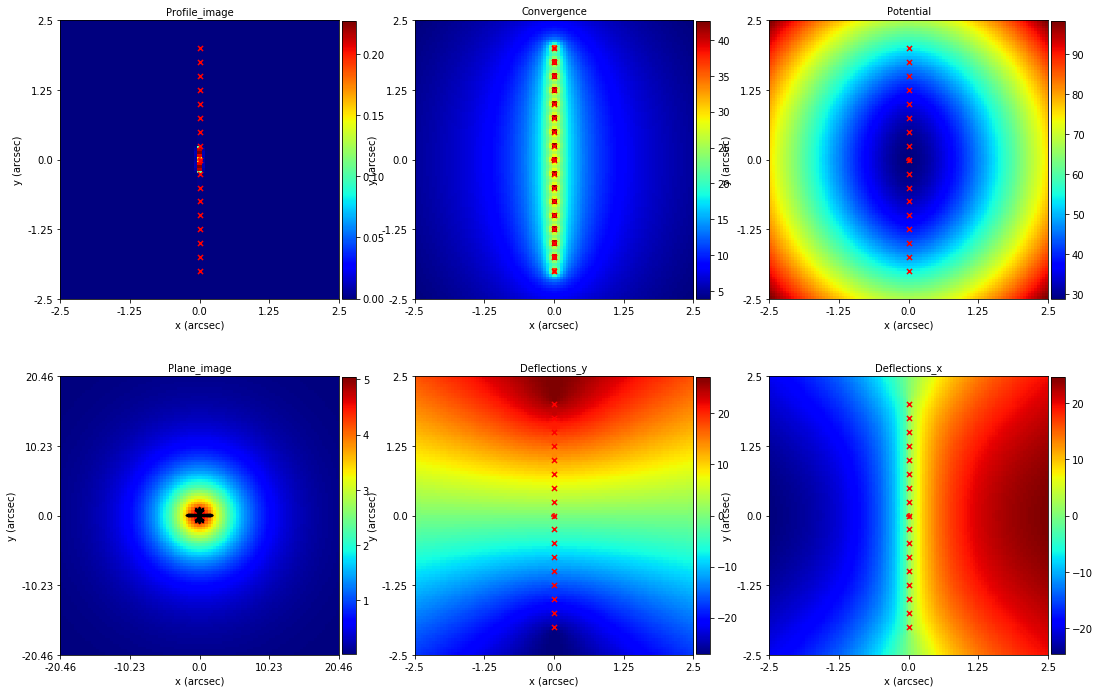

In [7]:
traced_profile_image = tracer.profile_image_from_grid(grid=image_plane_grid)
# aplt.tracer.profile_image(tracer=tracer, grid=image_plane_grid)
aplt.tracer.subplot_tracer(tracer=tracer, grid=image_plane_grid)

The profile image aligns as a line, and the plane images looks like a lotus and its reflection in the water horizon. The convergence looks like a bar, and the potential was stretched (**would be a two-way rainbow if masses are numerous enough**). In plot 'Deflections_y', the y will be 0 arcsec in the ideal case. In plot 'Deflections_x', the linear density mass will act as a boundary of low and high x value in the ideal case. 

We also want to see the grid to explore how it lenses. The image plane, source plane and its zoom-in is shown as follows.

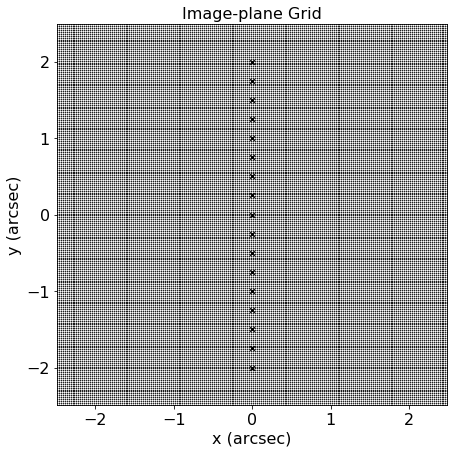

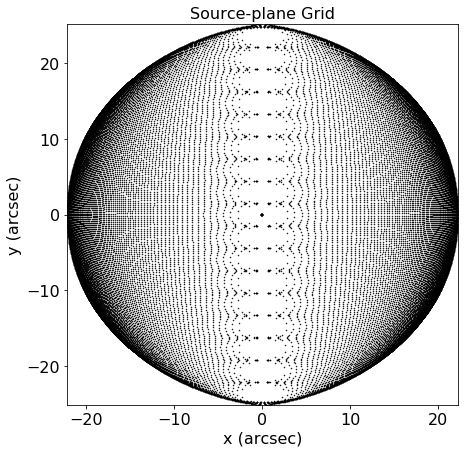

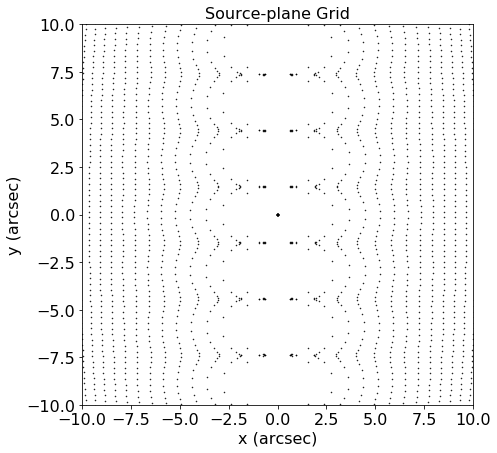

In [8]:
traced_grids = tracer.traced_grids_of_planes_from_grid(
    grid=image_plane_grid
)

# lens plane and source plane plotter
plotter = aplt.Plotter(labels=aplt.Labels(title="Image-plane Grid"))
aplt.plane.plane_grid(plane=tracer.image_plane, grid=traced_grids[0], plotter=plotter)
plotter = aplt.Plotter(labels=aplt.Labels(title="Source-plane Grid"))
aplt.plane.plane_grid(plane=tracer.source_plane, grid=traced_grids[1], plotter=plotter)

# zoom in
aplt.plane.plane_grid(
    plane=tracer.source_plane,
    grid=traced_grids[1],
    axis_limits=[-10, 10, -10, 10],
    plotter=plotter,
)

I've left the rest below commented to avoid too many print statements, but if you're feeling adventurous go ahead and uncomment the lines below!

In [9]:
# print(lens_galaxy)
# print(source_galaxy)
# print(tracer.planes)

## Conclusion

In this part, we simulate the lensing effects of a linear mass density. We use 17 mass profiles to roughly simulate the lensing effects and predict the feature plot in the ideal case, i.e. masses are numerous enough. We show the grid plots of two planes in the end.